### UK datasets - salary bands - NEW APPROACH

Data source and interactive plots: https://www.hesa.ac.uk/news/16-06-2022/sb263-higher-education-graduate-outcomes-statistics/salary<br>
Metadata: https://www.hesa.ac.uk/support/definitions/graduates<br>


Note:
- 22% of values are missing in the column "percent"
- cause salary is not mandatory, but self-reported
- catergory without missing values in 2017/18 and 2018/19:
    - Country of providers: ALL  (Region comparision is not possible as Wales got the most empties)
    - Domicile: ALL or ALL UK  (non-UK individuals are less willing to report)
    - Provider type: ALL
    - Level of qualification obtained: ALL or All postgraduate or All undergraduate
- use the same criterion in 2019/20:
    - missing values in male data
- There are two "Work population marker"
    - Paid employment is an activity -- employment 
    - Paid employment is most important activity  -- having activities more than employment

## 1. Prepare the workstation

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import the data sets
salary_1718 = pd.read_csv('Salary bands 2017-18.csv')
salary_1819 = pd.read_csv('Salary bands 2018-19.csv')
salary_1920 = pd.read_csv('Salary bands 2019-20.csv')

# view one of the DataFrame
salary_1718.head()

,Personal characteristic category,Salary band,Country of provider,Domicile,Provider type,Level of qualification obtained,Mode of former study,Work population marker,Academic year,Percent
0,Female,"Less than £15,000",All,All,All,All,All,Paid employment is an activity,2017/18,4%
1,Male,"Less than £15,000",All,All,All,All,All,Paid employment is an activity,2017/18,3%
2,Female,"Less than £15,000",All,All,All,All postgraduate,All,Paid employment is an activity,2017/18,1%
3,Male,"Less than £15,000",All,All,All,All postgraduate,All,Paid employment is an activity,2017/18,1%
4,Female,"Less than £15,000",All,All,All,All undergraduate,All,Paid employment is an activity,2017/18,5%


In [3]:
# check the shape
print(salary_1718.shape)
print(salary_1819.shape)
print(salary_1920.shape)

(139628, 10)
(140036, 10)
(138876, 10)


In [4]:
# Check the columns and variables
salary_1718.describe()

,Personal characteristic category,Salary band,Country of provider,Domicile,Provider type,Level of qualification obtained,Mode of former study,Work population marker,Academic year,Percent
count,139628,139628,139628,139628,139628,139628,139628,139628,139628,108038
unique,2,14,5,11,3,14,3,2,1,63
top,Female,"£21,000 - £23,999",All,All,All,All,All,Paid employment is an activity,2017/18,1%
freq,69814,11396,41628,22224,63636,17740,52284,70010,139628,11445


In [5]:
# Check the columns and variables
salary_1819.describe()

,Personal characteristic category,Salary band,Country of provider,Domicile,Provider type,Level of qualification obtained,Mode of former study,Work population marker,Academic year,Percent
count,140036,140036,140036,140036,140036,140036,140036,140036,140036,108297
unique,2,14,5,10,3,15,3,2,1,63
top,Female,"£30,000 - £32,999",All,All,All,All,All,Paid employment is an activity,2018/19,1%
freq,70018,11554,41178,22508,64006,17658,52074,70288,140036,10616


In [6]:
# Check the columns and variables
salary_1920.describe()

,Personal characteristic category,Salary band,Country of provider,Domicile,Provider type,Level of qualification obtained,Mode of former study,Work population marker,Academic year,Percent
count,138876,138876,138876,138876,138876,138876,138876,138876,138876,106426
unique,2,14,5,11,3,15,3,2,1,64
top,Female,"£24,000 - £26,999",All,All,All,All,All,Paid employment is an activity,2019/20,1%
freq,69438,11456,40856,22408,63648,17684,52358,69612,138876,11230


Domicile: 10 in 2018-19 <br>
Level of qualification obtained: 14 in 2017-18

In [7]:
# check for missing values
print('------ Data Frame: 19-20 ------')
print(salary_1920.isnull().sum())
print('------ Data Frame: 18-19------')
print(salary_1819.isnull().sum())
print('------ Data Frame: 17-18------')
print(salary_1718.isnull().sum())

------ Data Frame: 19-20 ------
Personal characteristic category        0
Salary band                             0
Country of provider                     0
Domicile                                0
Provider type                           0
Level of qualification obtained         0
Mode of former study                    0
Work population marker                  0
Academic year                           0
Percent                             32450
dtype: int64
------ Data Frame: 18-19------
Personal characteristic category        0
Salary band                             0
Country of provider                     0
Domicile                                0
Provider type                           0
Level of qualification obtained         0
Mode of former study                    0
Work population marker                  0
Academic year                           0
Percent                             31739
dtype: int64
------ Data Frame: 17-18------
Personal characteristic category        

In [8]:
# calculate the portion of missing values (for checking)
a = 31590/139628

a

0.22624401982410405

In [9]:
# calculate the portion of missing values
missing_1920 = round(salary_1920['Percent'].isnull().sum()/len(salary_1920['Percent'])*100, 4)

print(f'Missing values in 2019-20 dataset: {missing_1920}%.')

Missing values in 2019-20 dataset: 23.3662%.


In [10]:
# calculate the portion of missing values
missing_1819 = round(salary_1819['Percent'].isnull().sum()/len(salary_1819['Percent'])*100, 4)

print(f'Missing values in 2018-19 dataset: {missing_1819}%.')

Missing values in 2018-19 dataset: 22.6649%.


In [11]:
# calculate the portion of missing values
missing_1718 = round(salary_1718['Percent'].isnull().sum()/len(salary_1718['Percent'])*100, 4)

print(f'Missing values in 2017-18dataset: {missing_1718}%.')

Missing values in 2017-18dataset: 22.6244%.


Missing values take up **22%** of the column.

In [17]:
# merge all the datasets
salary = pd.concat([salary_1920, salary_1819, salary_1718])

salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418540 entries, 0 to 139627
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Personal characteristic category  418540 non-null  object
 1   Salary band                       418540 non-null  object
 2   Country of provider               418540 non-null  object
 3   Domicile                          418540 non-null  object
 4   Provider type                     418540 non-null  object
 5   Level of qualification obtained   418540 non-null  object
 6   Mode of former study              418540 non-null  object
 7   Work population marker            418540 non-null  object
 8   Academic year                     418540 non-null  object
 9   Percent                           322761 non-null  object
dtypes: object(10)
memory usage: 35.1+ MB


In [18]:
# Check the total number of rows
a = 139628 + 140036 + 138876

a

418540

In [19]:
# remove the symbol % in column "Percent"
salary['Percent'] = salary['Percent'].str.replace("%", "")

# check the changes
salary.head()

,Personal characteristic category,Salary band,Country of provider,Domicile,Provider type,Level of qualification obtained,Mode of former study,Work population marker,Academic year,Percent
0,Female,"Less than £15,000",All,All,All,All,All,Paid employment is an activity,2019/20,3
1,Male,"Less than £15,000",All,All,All,All,All,Paid employment is an activity,2019/20,2
2,Female,"Less than £15,000",All,All,All,All postgraduate,All,Paid employment is an activity,2019/20,1
3,Male,"Less than £15,000",All,All,All,All postgraduate,All,Paid employment is an activity,2019/20,1
4,Female,"Less than £15,000",All,All,All,All undergraduate,All,Paid employment is an activity,2019/20,4


In [20]:
# change the data type of the column "Percent"
salary['Percent'] = salary['Percent'].astype(float)

# check the changes
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418540 entries, 0 to 139627
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Personal characteristic category  418540 non-null  object 
 1   Salary band                       418540 non-null  object 
 2   Country of provider               418540 non-null  object 
 3   Domicile                          418540 non-null  object 
 4   Provider type                     418540 non-null  object 
 5   Level of qualification obtained   418540 non-null  object 
 6   Mode of former study              418540 non-null  object 
 7   Work population marker            418540 non-null  object 
 8   Academic year                     418540 non-null  object 
 9   Percent                           322761 non-null  float64
dtypes: float64(1), object(9)
memory usage: 35.1+ MB


In [67]:
salary.columns = ['Gender', 'Salary band', 'Country of provider', 'Domicile',
                  'Provider type', 'Level of qualification obtained', 'Mode of former study',
                  'Work population marker', 'Year', 'Percent']

salary.head()

,Gender,Salary band,Country of provider,Domicile,Provider type,Level of qualification obtained,Mode of former study,Work population marker,Year,Percent
0,Female,"Less than £15,000",All,All,All,All,All,Paid employment is an activity,2019/20,3.0
1,Male,"Less than £15,000",All,All,All,All,All,Paid employment is an activity,2019/20,2.0
2,Female,"Less than £15,000",All,All,All,All postgraduate,All,Paid employment is an activity,2019/20,1.0
3,Male,"Less than £15,000",All,All,All,All postgraduate,All,Paid employment is an activity,2019/20,1.0
4,Female,"Less than £15,000",All,All,All,All undergraduate,All,Paid employment is an activity,2019/20,4.0


## 2. Subset and explore
**NOTE: missing values are kept to avoid misinterpretation caused by no data**

## Case 1: All

In [21]:
# group the merged DataFrame by Salary band
salary_all_employed = salary[(salary['Work population marker'] == "Paid employment is an activity") &
                             (salary['Country of provider'] == "All") &
                             (salary['Domicile'] == "All") &
                             (salary['Provider type'] == "All") &
                             (salary['Level of qualification obtained'] == "All") &
                             (salary['Mode of former study'] == "All")].reset_index().copy()
                                        
salary_all_employed.head()

,index,Personal characteristic category,Salary band,Country of provider,Domicile,Provider type,Level of qualification obtained,Mode of former study,Work population marker,Academic year,Percent
0,0,Female,"Less than £15,000",All,All,All,All,All,Paid employment is an activity,2019/20,3.0
1,1,Male,"Less than £15,000",All,All,All,All,All,Paid employment is an activity,2019/20,2.0
2,8816,Female,"£15,000 - £17,999",All,All,All,All,All,Paid employment is an activity,2019/20,5.0
3,8817,Male,"£15,000 - £17,999",All,All,All,All,All,Paid employment is an activity,2019/20,4.0
4,18236,Female,"£18,000 - £20,999",All,All,All,All,All,Paid employment is an activity,2019/20,13.0


In [22]:
# check the missing values
print(salary_all_employed.isnull().sum())

index                               0
Personal characteristic category    0
Salary band                         0
Country of provider                 0
Domicile                            0
Provider type                       0
Level of qualification obtained     0
Mode of former study                0
Work population marker              0
Academic year                       0
Percent                             0
dtype: int64


In [23]:
# drop the unnecessary columns
salary_all_employed.drop(columns=['index',
                                  'Country of provider',
                                  'Domicile',
                                  'Provider type',
                                  'Level of qualification obtained',
                                  'Mode of former study',
                                  'Work population marker'],
                         inplace=True)
           
# Check the changes
salary_all_employed.head()

,Personal characteristic category,Salary band,Academic year,Percent
0,Female,"Less than £15,000",2019/20,3.0
1,Male,"Less than £15,000",2019/20,2.0
2,Female,"£15,000 - £17,999",2019/20,5.0
3,Male,"£15,000 - £17,999",2019/20,4.0
4,Female,"£18,000 - £20,999",2019/20,13.0


In [26]:
salary_all_employed_female = salary_all_employed[salary_all_employed['Gender'] == "Female"].reset_index().copy()

salary_all_employed_female.head()

,index,Gender,Salary band,Year,Percent
0,0,Female,"Less than £15,000",2019/20,3.0
1,2,Female,"£15,000 - £17,999",2019/20,5.0
2,4,Female,"£18,000 - £20,999",2019/20,13.0
3,6,Female,"£21,000 - £23,999",2019/20,13.0
4,8,Female,"£24,000 - £26,999",2019/20,24.0


In [27]:
salary_all_employed_male = salary_all_employed[salary_all_employed['Gender'] == "Male"].reset_index().copy()

salary_all_employed_male.head()

,index,Gender,Salary band,Year,Percent
0,1,Male,"Less than £15,000",2019/20,2.0
1,3,Male,"£15,000 - £17,999",2019/20,4.0
2,5,Male,"£18,000 - £20,999",2019/20,11.0
3,7,Male,"£21,000 - £23,999",2019/20,11.0
4,9,Male,"£24,000 - £26,999",2019/20,17.0


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

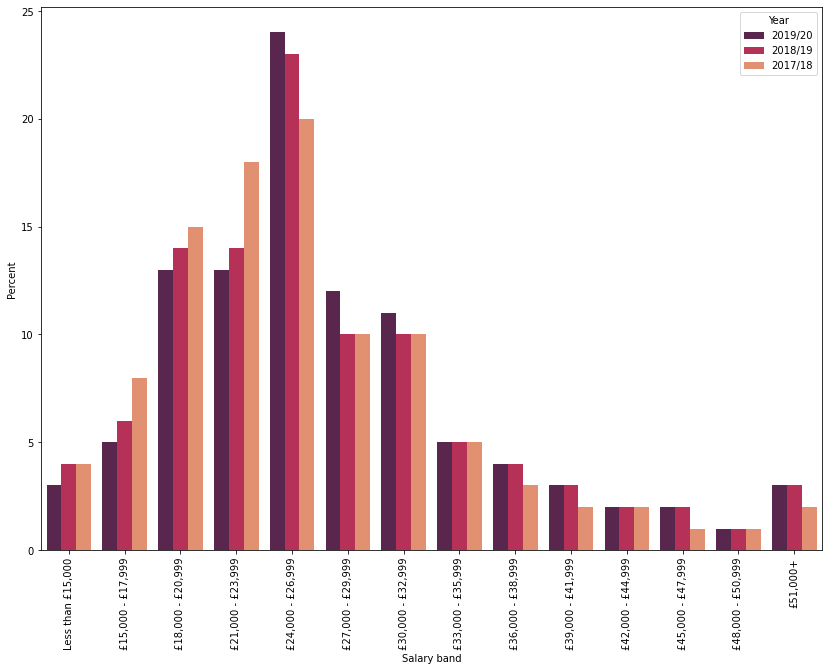

In [51]:
# The changes over distribution of FEMALE salary bands from 2017 to 2020
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_all_employed_female,
            palette="rocket")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

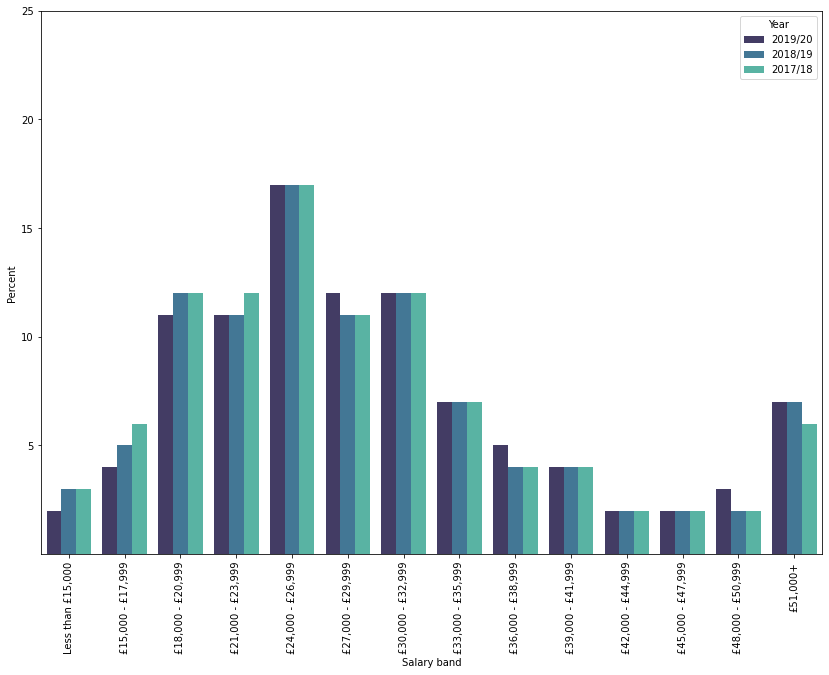

In [53]:
# The changes over distribution of FEMALE salary bands from 2017 to 2020
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_all_employed_male,
            palette="mako")

plt.yticks([5,10,15,20,25])

plt.xticks(rotation=90)

In [78]:
# subset of 2019/20
salary_all_employed_1920 = salary_all_employed[salary_all_employed['Year'] == "2019/20"]

salary_all_employed_1920.head()

,Gender,Salary band,Year,Percent
0,Female,"Less than £15,000",2019/20,3.0
1,Male,"Less than £15,000",2019/20,2.0
2,Female,"£15,000 - £17,999",2019/20,5.0
3,Male,"£15,000 - £17,999",2019/20,4.0
4,Female,"£18,000 - £20,999",2019/20,13.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

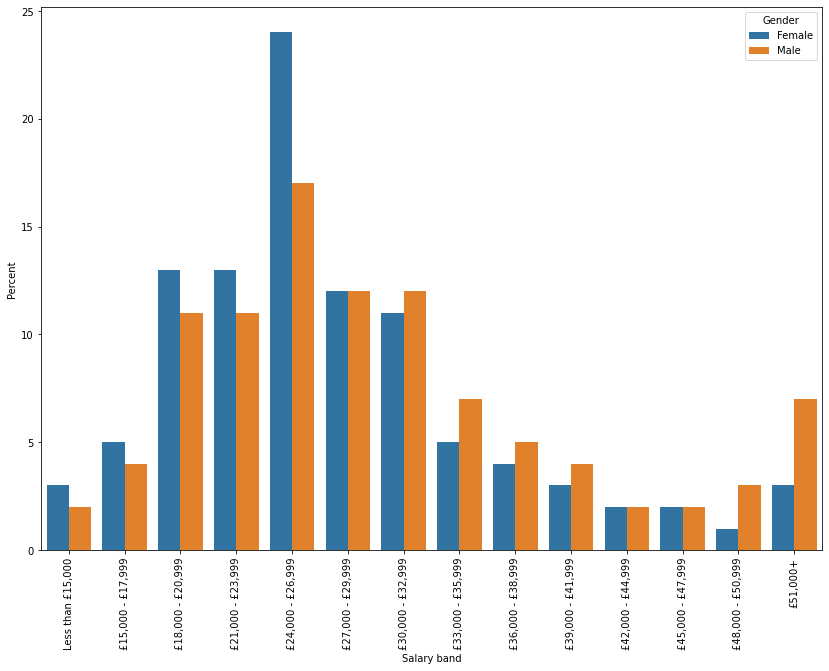

In [79]:
# The distribution of salary in 2019-20, by gender
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Gender", estimator=sum, data=salary_all_employed_1920)

plt.xticks(rotation=90)

## Case 2: All undergraduates

In [56]:
salary['Level of qualification obtained'].value_counts()

All                                               53082
All undergraduate                                 49254
All postgraduate                                  45308
First degree                                      44368
Masters taught                                    38760
Other postgraduate taught                         36032
Other undergraduate                               33876
Doctorate research                                31236
Postgraduate Certificate in Education             18904
Other postgraduate research                       18320
HNC/HND                                           16460
Foundation degree                                 16084
Professional Graduate Certificate in Education     9504
Undergraduate unknown                              5912
Postgraduate unknown                               1440
Name: Level of qualification obtained, dtype: int64

In [68]:
# group the merged DataFrame by Salary band
salary_undergrad_employed = salary[(salary['Work population marker'] == "Paid employment is an activity") &
                             (salary['Country of provider'] == "All") &
                             (salary['Domicile'] == "All") &
                             (salary['Provider type'] == "All") &
                             (salary['Level of qualification obtained'] == "All undergraduate") &
                             (salary['Mode of former study'] == "All")].reset_index().copy()
                                        
salary_undergrad_employed.head()

,index,Gender,Salary band,Country of provider,Domicile,Provider type,Level of qualification obtained,Mode of former study,Work population marker,Year,Percent
0,4,Female,"Less than £15,000",All,All,All,All undergraduate,All,Paid employment is an activity,2019/20,4.0
1,5,Male,"Less than £15,000",All,All,All,All undergraduate,All,Paid employment is an activity,2019/20,3.0
2,8820,Female,"£15,000 - £17,999",All,All,All,All undergraduate,All,Paid employment is an activity,2019/20,6.0
3,8821,Male,"£15,000 - £17,999",All,All,All,All undergraduate,All,Paid employment is an activity,2019/20,4.0
4,18240,Female,"£18,000 - £20,999",All,All,All,All undergraduate,All,Paid employment is an activity,2019/20,16.0


In [69]:
# check the missing values
print(salary_undergrad_employed.isnull().sum())

index                              0
Gender                             0
Salary band                        0
Country of provider                0
Domicile                           0
Provider type                      0
Level of qualification obtained    0
Mode of former study               0
Work population marker             0
Year                               0
Percent                            0
dtype: int64


In [70]:
# drop the unnecessary columns
salary_undergrad_employed.drop(columns=['index',
                                  'Country of provider',
                                  'Domicile',
                                  'Provider type',
                                  'Level of qualification obtained',
                                  'Mode of former study',
                                  'Work population marker'],
                         inplace=True)
           
# Check the changes
salary_undergrad_employed.head()

,Gender,Salary band,Year,Percent
0,Female,"Less than £15,000",2019/20,4.0
1,Male,"Less than £15,000",2019/20,3.0
2,Female,"£15,000 - £17,999",2019/20,6.0
3,Male,"£15,000 - £17,999",2019/20,4.0
4,Female,"£18,000 - £20,999",2019/20,16.0


In [76]:
salary_undergrad_employed_female = \
salary_undergrad_employed[salary_all_employed['Gender'] == "Female"].reset_index().copy()

salary_undergrad_employed_female.head()

,index,Gender,Salary band,Year,Percent
0,0,Female,"Less than £15,000",2019/20,4.0
1,2,Female,"£15,000 - £17,999",2019/20,6.0
2,4,Female,"£18,000 - £20,999",2019/20,16.0
3,6,Female,"£21,000 - £23,999",2019/20,15.0
4,8,Female,"£24,000 - £26,999",2019/20,27.0


In [72]:
salary_undergrad_employed_male = \
salary_undergrad_employed[salary_all_employed['Gender'] == "Male"].reset_index().copy()

salary_undergrad_employed_male.head()

,index,Gender,Salary band,Year,Percent
0,1,Male,"Less than £15,000",2019/20,3.0
1,3,Male,"£15,000 - £17,999",2019/20,4.0
2,5,Male,"£18,000 - £20,999",2019/20,14.0
3,7,Male,"£21,000 - £23,999",2019/20,13.0
4,9,Male,"£24,000 - £26,999",2019/20,19.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

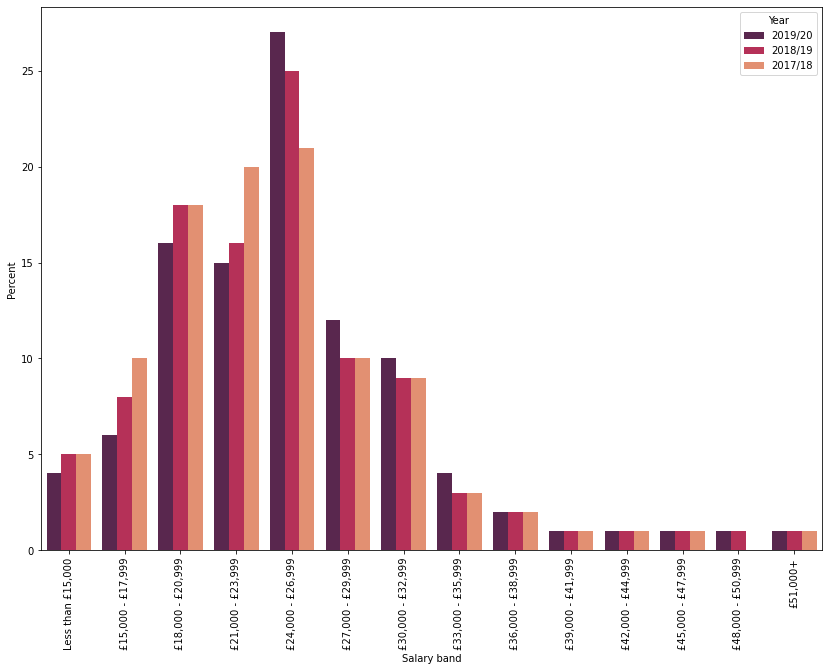

In [73]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_undergrad_employed_female,
            palette="rocket")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

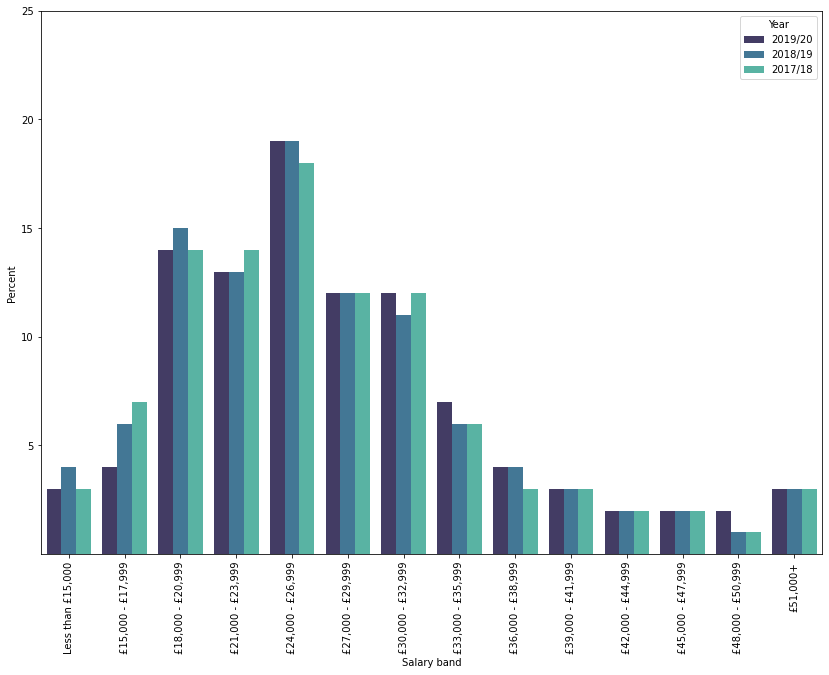

In [74]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_undergrad_employed_male,
            palette="mako")

plt.yticks([5,10,15,20,25])

plt.xticks(rotation=90)

In [80]:
# subset of 2019/20
salary_undergrad_employed_1920 = salary_undergrad_employed[salary_undergrad_employed['Year'] == "2019/20"]

salary_undergrad_employed_1920.head()

,Gender,Salary band,Year,Percent
0,Female,"Less than £15,000",2019/20,4.0
1,Male,"Less than £15,000",2019/20,3.0
2,Female,"£15,000 - £17,999",2019/20,6.0
3,Male,"£15,000 - £17,999",2019/20,4.0
4,Female,"£18,000 - £20,999",2019/20,16.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

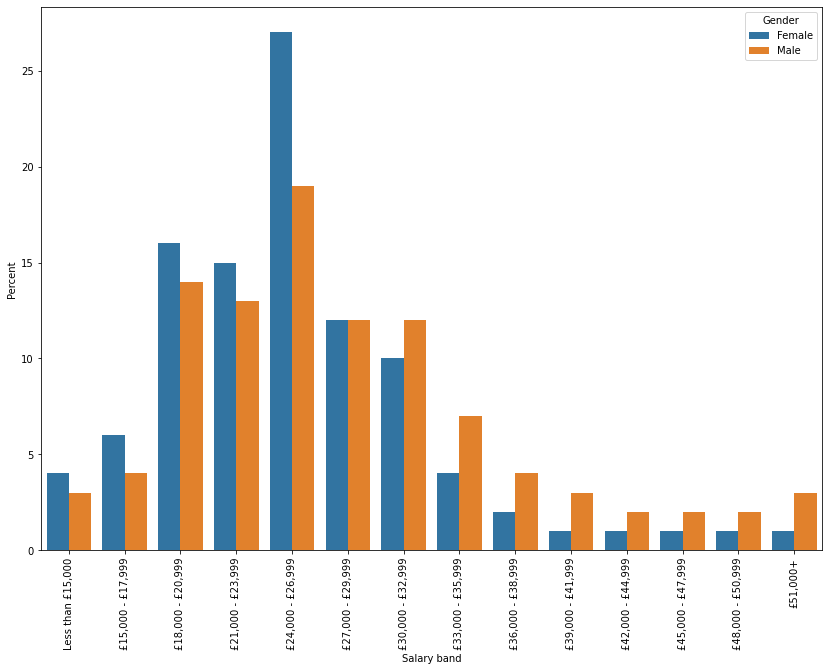

In [81]:
# The distribution of salary in 2019-20, by gender
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Gender", estimator=sum, data=salary_undergrad_employed_1920)

plt.xticks(rotation=90)

## Case 3: All postgraduates

In [82]:
# group the merged DataFrame by Salary band
salary_postgrad_employed = salary[(salary['Work population marker'] == "Paid employment is an activity") &
                                  (salary['Country of provider'] == "All") &
                                  (salary['Domicile'] == "All") &
                                  (salary['Provider type'] == "All") &
                                  (salary['Level of qualification obtained'] == "All postgraduate") &
                                  (salary['Mode of former study'] == "All")].reset_index().copy()
                                          
salary_postgrad_employed.head()

,index,Gender,Salary band,Country of provider,Domicile,Provider type,Level of qualification obtained,Mode of former study,Work population marker,Year,Percent
0,2,Female,"Less than £15,000",All,All,All,All postgraduate,All,Paid employment is an activity,2019/20,1.0
1,3,Male,"Less than £15,000",All,All,All,All postgraduate,All,Paid employment is an activity,2019/20,1.0
2,8818,Female,"£15,000 - £17,999",All,All,All,All postgraduate,All,Paid employment is an activity,2019/20,3.0
3,8819,Male,"£15,000 - £17,999",All,All,All,All postgraduate,All,Paid employment is an activity,2019/20,2.0
4,18238,Female,"£18,000 - £20,999",All,All,All,All postgraduate,All,Paid employment is an activity,2019/20,8.0


In [83]:
# Check for missing values
print(salary_postgrad_employed.isnull().sum())

index                              0
Gender                             0
Salary band                        0
Country of provider                0
Domicile                           0
Provider type                      0
Level of qualification obtained    0
Mode of former study               0
Work population marker             0
Year                               0
Percent                            0
dtype: int64


In [85]:
# drop the unnecessary columns
salary_postgrad_employed.drop(columns=['index',
                                      'Country of provider',
                                      'Domicile',
                                      'Provider type',
                                      'Level of qualification obtained',
                                      'Mode of former study',
                                      'Work population marker'],
                             inplace=True)
             
# Check the changes
salary_postgrad_employed.head()

,Gender,Salary band,Year,Percent
0,Female,"Less than £15,000",2019/20,1.0
1,Male,"Less than £15,000",2019/20,1.0
2,Female,"£15,000 - £17,999",2019/20,3.0
3,Male,"£15,000 - £17,999",2019/20,2.0
4,Female,"£18,000 - £20,999",2019/20,8.0


In [86]:
salary_postgrad_employed_female =\
salary_postgrad_employed[salary_postgrad_employed['Gender'] == "Female"]

salary_postgrad_employed_female.head()

,Gender,Salary band,Year,Percent
0,Female,"Less than £15,000",2019/20,1.0
2,Female,"£15,000 - £17,999",2019/20,3.0
4,Female,"£18,000 - £20,999",2019/20,8.0
6,Female,"£21,000 - £23,999",2019/20,9.0
8,Female,"£24,000 - £26,999",2019/20,18.0


In [87]:
salary_postgrad_employed_male =\
salary_postgrad_employed[salary_postgrad_employed['Gender'] == "Male"]

salary_postgrad_employed_male.head()

,Gender,Salary band,Year,Percent
1,Male,"Less than £15,000",2019/20,1.0
3,Male,"£15,000 - £17,999",2019/20,2.0
5,Male,"£18,000 - £20,999",2019/20,6.0
7,Male,"£21,000 - £23,999",2019/20,7.0
9,Male,"£24,000 - £26,999",2019/20,13.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

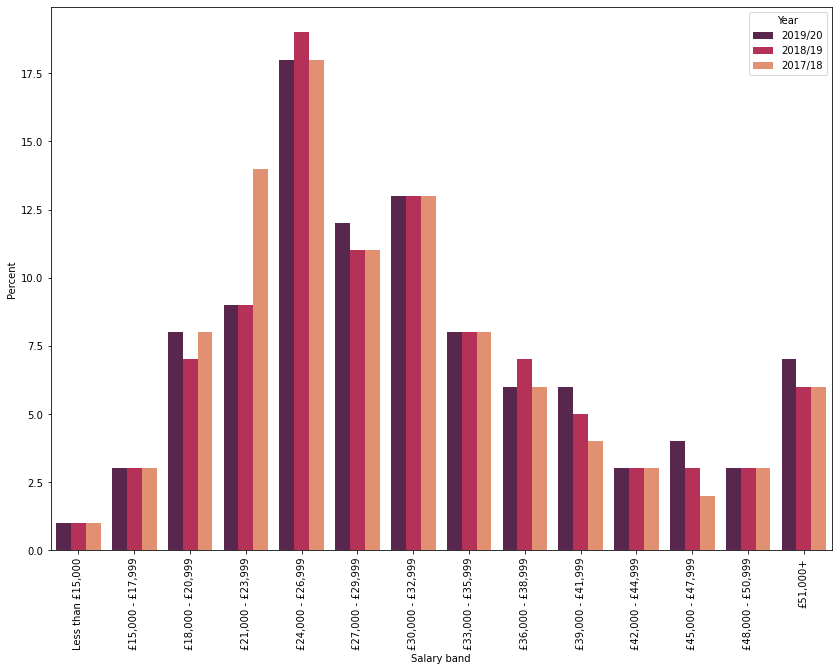

In [88]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_postgrad_employed_female,
            palette="rocket")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

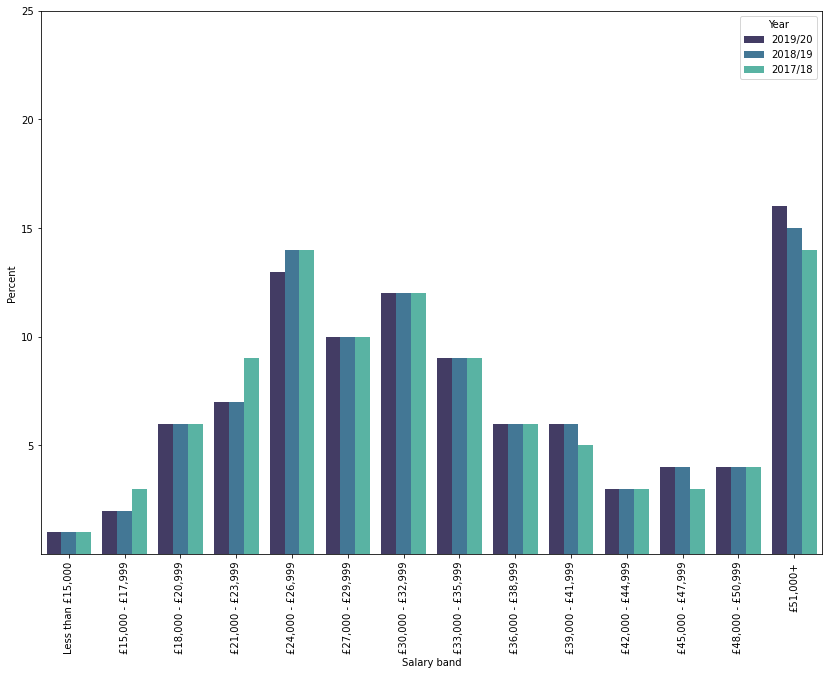

In [89]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_postgrad_employed_male,
            palette="mako")

plt.yticks([5,10,15,20,25])

plt.xticks(rotation=90)

In [90]:
# Subset of 2019/20
salary_postgrad_employed_1920 = salary_postgrad_employed[salary_all_employed['Year'] == "2019/20"]

salary_postgrad_employed_1920.head()

,Gender,Salary band,Year,Percent
0,Female,"Less than £15,000",2019/20,1.0
1,Male,"Less than £15,000",2019/20,1.0
2,Female,"£15,000 - £17,999",2019/20,3.0
3,Male,"£15,000 - £17,999",2019/20,2.0
4,Female,"£18,000 - £20,999",2019/20,8.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

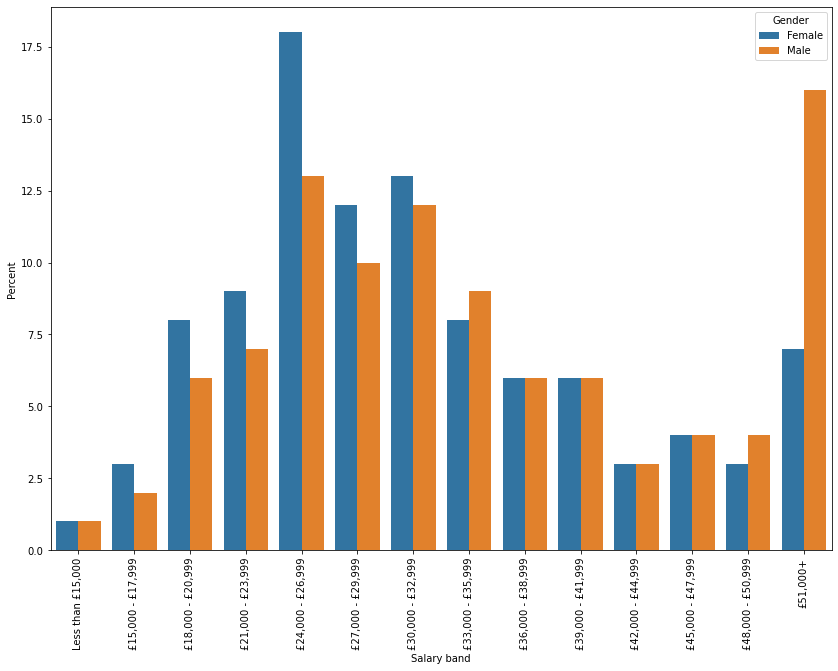

In [91]:
# The distribution of salary in 2019-20, by gender
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Gender", estimator=sum, data=salary_postgrad_employed_1920)

plt.xticks(rotation=90)